In [1]:
import numpy as np
from astropy.table import Table
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
COLORS = (
'#000000',
'#0072b2',
'#56b4e9',
'#009e73',
'#cc79a7',
'#d55e00',
'#e69f00',
'#f0e442')

In [3]:
OBSID=1147217904
FREQ='121-132'


In [4]:
t = Table.read("%d_%s_double.vot" % (OBSID, FREQ))


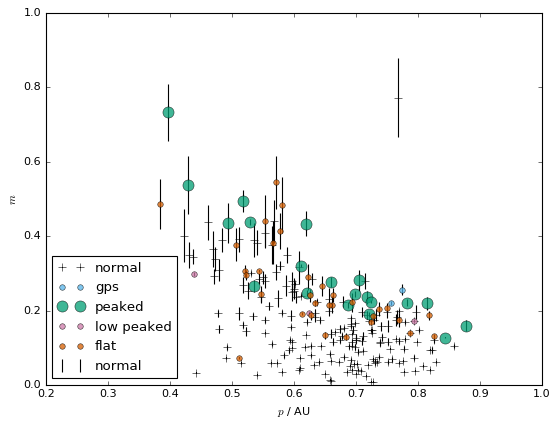

In [14]:
fig = plt.figure(figsize=(8, 6))
normal = ~(t['peaked'] | t['flat'])
flat = (t['flat'] & ~(t['peaked'] | t['gps'] | t['peak_below_72mhz'] | t['convex']))
plt.errorbar(np.sin(np.radians(t['elongation'])), t['scint_index'], t['index_err'], fmt=',', capsize=0, markersize=8, color=COLORS[0], label='normal')
plt.plot(np.sin(np.radians(t['elongation'][normal])), t['scint_index'][normal], '+', lw=3, markersize=8, color=COLORS[0], label='normal')
plt.plot(np.sin(np.radians(t['elongation'][t['gps']])), t['scint_index'][t['gps']], 'o', markersize=5, alpha=0.75, color=COLORS[2], label='gps')
plt.plot(np.sin(np.radians(t['elongation'][t['peaked']])), t['scint_index'][t['peaked']], 'o', markersize=10, alpha=0.75, color=COLORS[3], label='peaked')
plt.plot(np.sin(np.radians(t['elongation'][t['peak_below_72mhz']])), t['scint_index'][t['peak_below_72mhz']], 'o', markersize=5, alpha=0.75, color=COLORS[4], label='low peaked')
plt.plot(np.sin(np.radians(t['elongation'][flat])), t['scint_index'][flat], 'o', markersize=5, alpha=0.75, color=COLORS[5], label='flat')
plt.xlim(0.2, 1)
plt.ylim(0, 1)
plt.xlabel('$p$ / AU')
plt.ylabel('$m$')
plt.legend(loc='lower left')